In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Deep Learn/creditcard.csv")

In [3]:
df.head()

Time        V1        V2        V3  ...       V27       V28  Amount  Class
0   0.0 -1.359807 -0.072781  2.536347  ...  0.133558 -0.021053  149.62      0
1   0.0  1.191857  0.266151  0.166480  ... -0.008983  0.014724    2.69      0
2   1.0 -1.358354 -1.340163  1.773209  ... -0.055353 -0.059752  378.66      0
3   1.0 -0.966272 -0.185226  1.792993  ...  0.062723  0.061458  123.50      0
4   2.0 -1.158233  0.877737  1.548718  ...  0.219422  0.215153   69.99      0

[5 rows x 31 columns]

In [4]:
##All the features in dataset are numerical and target class has binary values of 0 and 1.
##Dataset has 284807 records and 30 features.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
##Dataset contain no missing values.
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

V4 0.6762885361363855


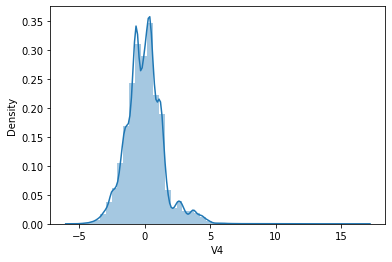

V6 1.8265710448869008


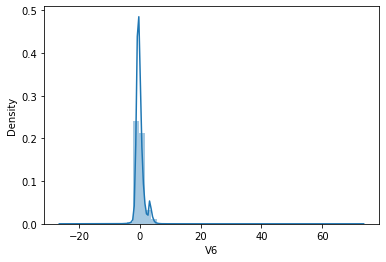

V7 2.5538939666831117


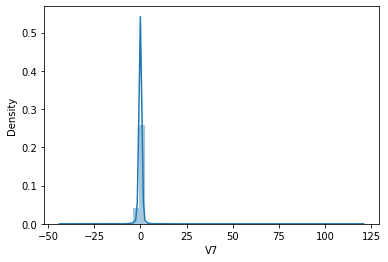

V9 0.5546768505565418


V10 1.1871343376109698


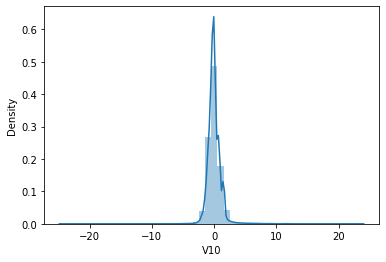

V21 3.5929722697554753


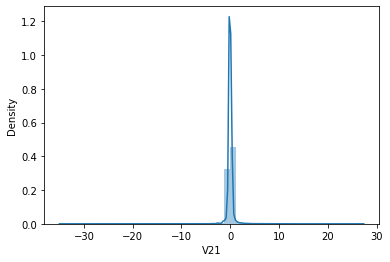

V26 0.5766895799228516


V28 11.19203224646587


Amount 16.97763503663315


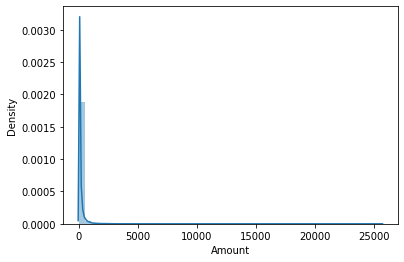

Class 23.99745292182408


No of column skewed more than 0.5 : 10


In [6]:
##Checking skeewness 
from scipy.stats import skew
count = 0
for col in df:
    if skew(df[col]) > 0.5:
      count+=1
      print(col,skew(df[col]))
      plt.figure()
      sns.distplot(df[col])
      plt.show()
print('No of column skewed more than 0.5 :',count)

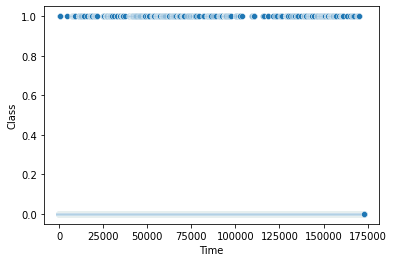

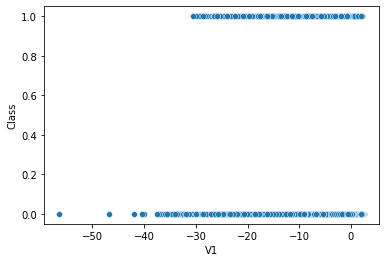

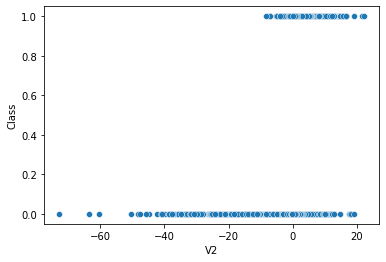

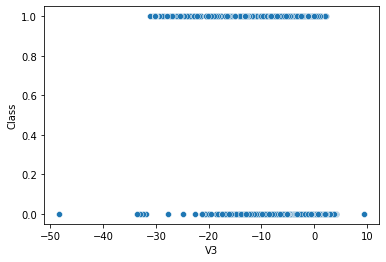

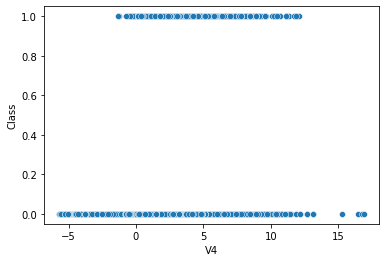

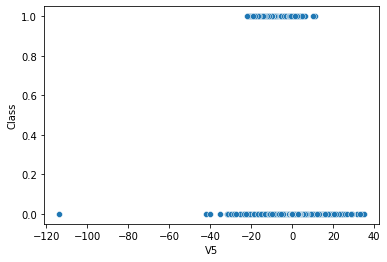

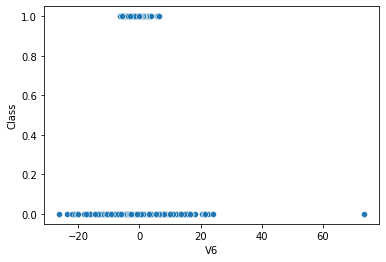

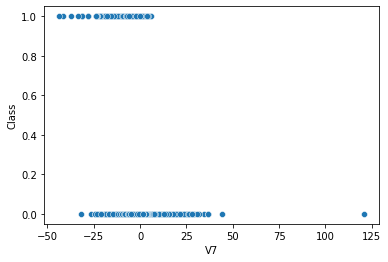

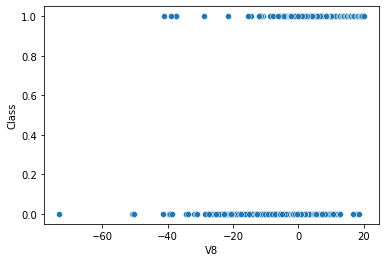

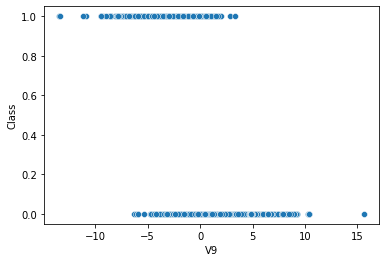

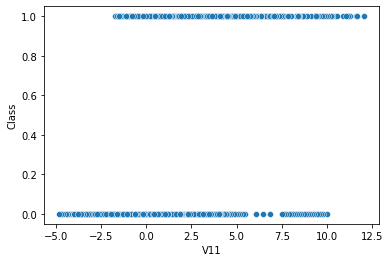

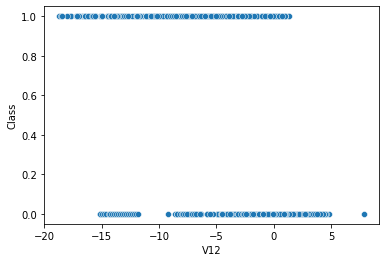

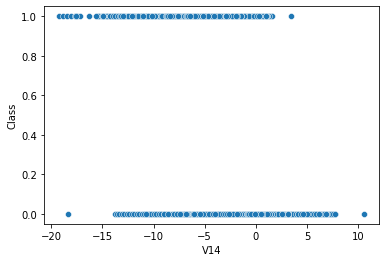

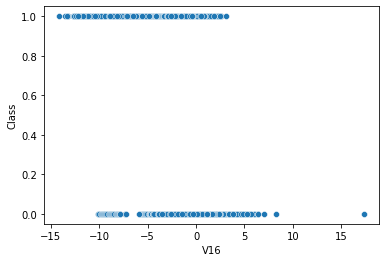

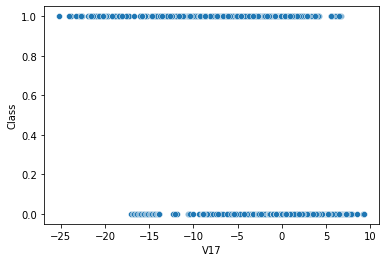

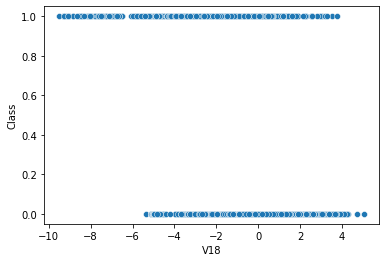

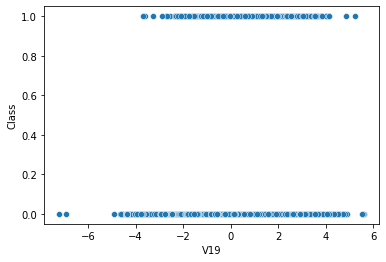

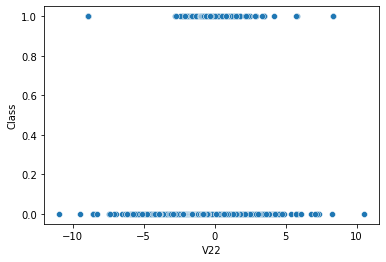

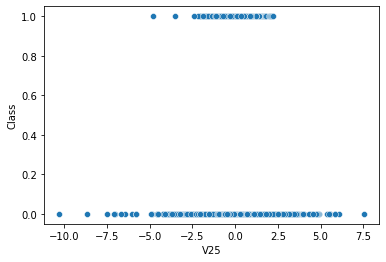

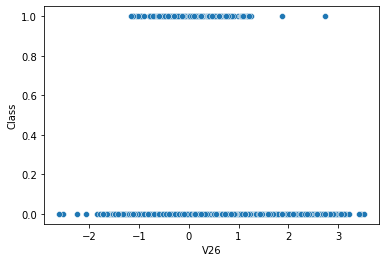

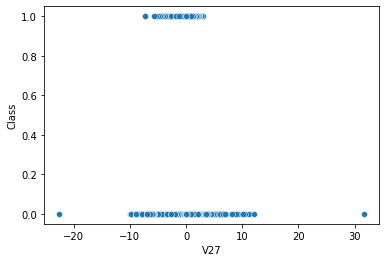

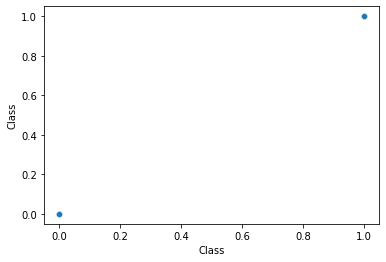

In [7]:
##Checking features relation with target.

for col in df:
  plt.figure()
  sns.scatterplot(df[col],y=df['Class'])
  plt.show()


In [8]:
##checking correaltion between features and target

corr_ = df.corr()
corr_['Class'].sort_values(ascending=False)
##featurs V11,V4,V17,V14,V12,V10 have positive and negative linear relation with target comparing other ones.

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

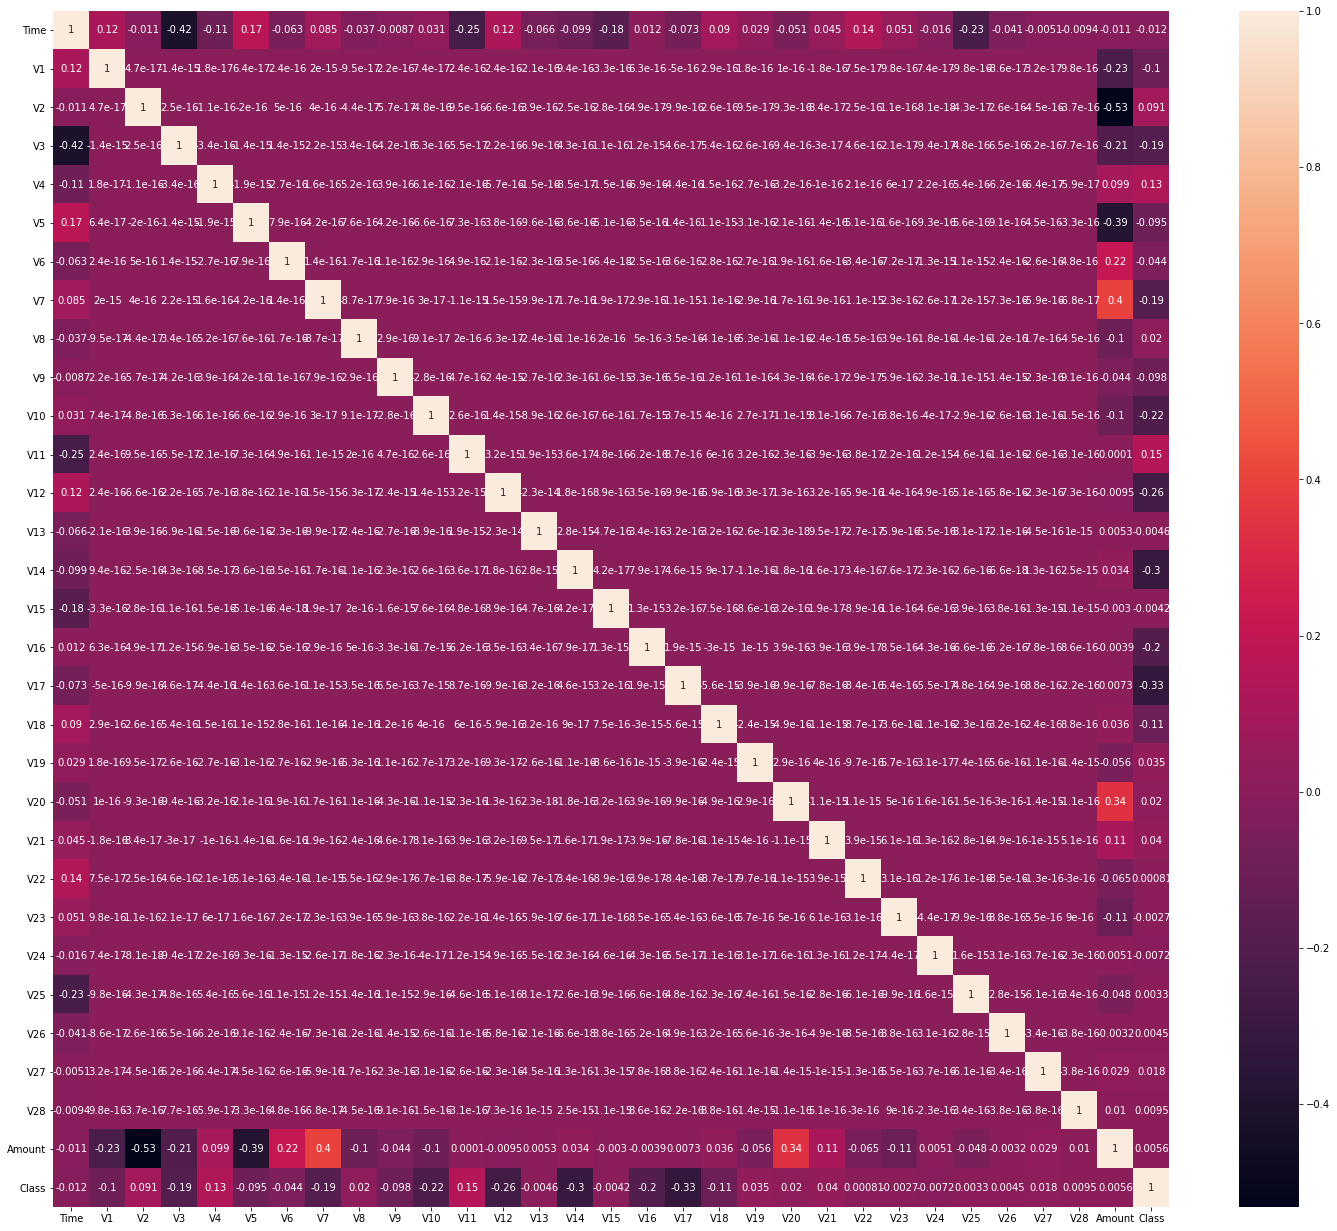

In [9]:
plt.figure(figsize=(25,22))
sns.heatmap(corr_,annot=True)
plt.show()

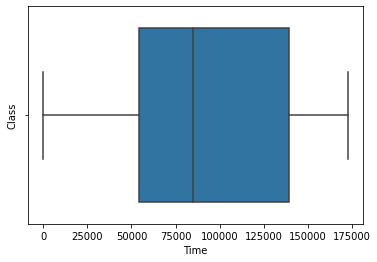

In [10]:
plt.figure()
sns.boxplot(df['Time'],hue=df['Class'])
plt.ylabel('Class')
plt.show()

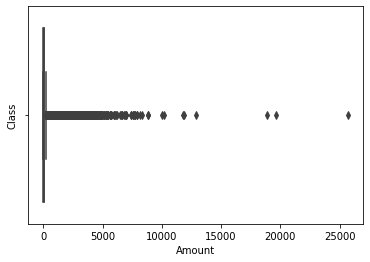

In [11]:
plt.figure()
sns.boxplot(df['Amount'],hue=df['Class'])
plt.ylabel('Class')
plt.show()

In [12]:
##Handling the Imabalnce dataset using over sampling.

0    284315
1       492
Name: Class, dtype: int64
---------------------------------------------------


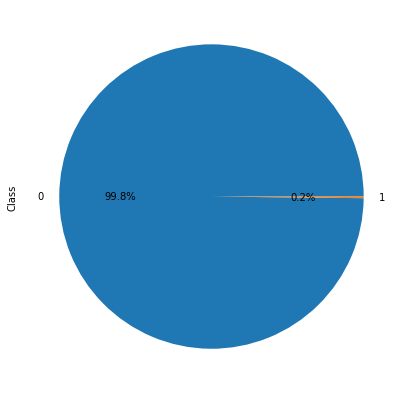

---------------------------------------------------


In [13]:
print(df["Class"].value_counts())
print("---------------------------------------------------")
plt.figure(figsize=(7,7))
df["Class"].value_counts().plot.pie(autopct="%.1f%%")
plt.show()
print("---------------------------------------------------")


In [14]:
##Splitting the data into training and testing form 

In [15]:

y = df["Class"]
X = df.drop("Class",axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [16]:
##Feature Scaling 

In [17]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [18]:
##Performing oversampling to balance the dataset

In [19]:
from imblearn.over_sampling import RandomOverSampler

In [20]:
RSample = RandomOverSampler(random_state=1)

In [21]:
X_sample, y_sample = RSample.fit_sample(X_train_ss,y_train)

In [22]:
##Base Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,recall_score,accuracy_score,precision_score

Lreg = LogisticRegression()
Lreg.fit(X_sample,y_sample)
y_pred = Lreg.predict(X_test)

In [23]:
print(classification_report(y_test,y_pred))
print('Accuracy_score:',accuracy_score(y_test,y_pred))
print('precision_score:',precision_score(y_test,y_pred))
print('recall_score:',recall_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.00      0.00      0.00       135

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy_score: 0.9974602951675386
precision_score: 0.0
recall_score: 0.0


In [24]:
##Neural Network

In [25]:
model = Sequential()
model.add(Dense(32,activation="tanh", input_dim=30))
model.add(Dense(16, activation="tanh"))
model.add(Dense(1, activation="sigmoid"))

In [26]:
model.compile(optimizer="sgd", loss="binary_crossentropy")

In [27]:
trained_model = model.fit(X_sample, y_sample, epochs=10,batch_size=100)

Epoch 1/10
3981/3981 [==============================] - 6s 1ms/step - loss: 0.1574
Epoch 2/10
3981/3981 [==============================] - 5s 1ms/step - loss: 0.0884
Epoch 3/10
3981/3981 [==============================] - 5s 1ms/step - loss: 0.0632
Epoch 4/10
3981/3981 [==============================] - 5s 1ms/step - loss: 0.0460
Epoch 5/10
3981/3981 [==============================] - 5s 1ms/step - loss: 0.0351
Epoch 6/10
3981/3981 [==============================] - 5s 1ms/step - loss: 0.0280
Epoch 7/10
3981/3981 [==============================] - 5s 1ms/step - loss: 0.0231
Epoch 8/10
3981/3981 [==============================] - 5s 1ms/step - loss: 0.0196
Epoch 9/10
3981/3981 [==============================] - 5s 1ms/step - loss: 0.0170
Epoch 10/10
3981/3981 [==============================] - 5s 1ms/step - loss: 0.0150


In [28]:
y_pred2 = model.predict(X_test_ss)

In [29]:
y_pred2 = np.where(y_pred2 >= 0.5,1,0)

In [30]:
from sklearn.metrics import classification_report

In [31]:
print(classification_report(y_test,y_pred2))
print('Accuracy_score:',accuracy_score(y_test,y_pred2))
print('precision_score:',precision_score(y_test,y_pred2))
print('recall_score:',recall_score(y_test,y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85308
           1       0.21      0.85      0.34       135

    accuracy                           0.99     85443
   macro avg       0.60      0.92      0.67     85443
weighted avg       1.00      0.99      1.00     85443

Accuracy_score: 0.9946748124480648
precision_score: 0.20909090909090908
recall_score: 0.8518518518518519
